# Data Loader 
This cells in this file wil load each of the datasets and then save then as numpy arrays in the same folder that the og data was found in.  
  
Ideally this should be run once.

#### Imports

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
np.set_printoptions(threshold=np.inf, linewidth=np.inf)


#### Data loader
Now anytime you want to grab the data run `np.load("path/to/file.npy")`

In [4]:
fiveFiftyPath = r"..\..\5_mr_50_cond\simulated_noNoise.txt"
fourtyFiftyPath = r"..\..\40_mr_50_cond\simulated_noNoise.txt"
hundidHundidPath = r"..\..\100_mr_100_cond\simulated_noNoise.txt"


data_5_mr_50_cond = np.loadtxt(fiveFiftyPath)
np.save(r"..\..\5_mr_50_cond\simulated_noNoiseAll", data_5_mr_50_cond)
data_5_mr_50_cond_tfs = data_5_mr_50_cond[1:,:100]
np.save(r"..\..\5_mr_50_cond\simulated_noNoiseTFs", data_5_mr_50_cond_tfs)
data_5_mr_50_cond_tgs = data_5_mr_50_cond[1:,100:200]
np.save(r"..\..\5_mr_50_cond\simulated_noNoiseTGs", data_5_mr_50_cond_tgs)

data_40_mr_50_cond = np.loadtxt(fourtyFiftyPath)
np.save(r"..\..\40_mr_50_cond\simulated_noNoiseAll", data_40_mr_50_cond)
data_40_mr_50_cond_tfs = data_40_mr_50_cond[1:,:100]
np.save(r"..\..\40_mr_50_cond\simulated_noNoiseTFs", data_40_mr_50_cond_tfs)
data_40_mr_50_cond_tgs = data_40_mr_50_cond[1:,100:200]
np.save(r"..\..\40_mr_50_cond\simulated_noNoiseTGs", data_40_mr_50_cond_tgs)

data_100_mr_100_cond = np.loadtxt(hundidHundidPath)
np.save(r"..\..\100_mr_100_cond\simulated_noNoiseAll", data_100_mr_100_cond)
data_100_mr_100_cond_tfs = data_100_mr_100_cond[1:,:100]
np.save(r"..\..\100_mr_100_cond\simulated_noNoiseTFs", data_100_mr_100_cond_tfs)
data_100_mr_100_cond_tgs = data_100_mr_100_cond[1:,100:200]
np.save(r"..\..\100_mr_100_cond\simulated_noNoiseTGs", data_100_mr_100_cond_tgs)



Normalized Target Genes and TFs for 100 MR, 40 MR, and 5 MR


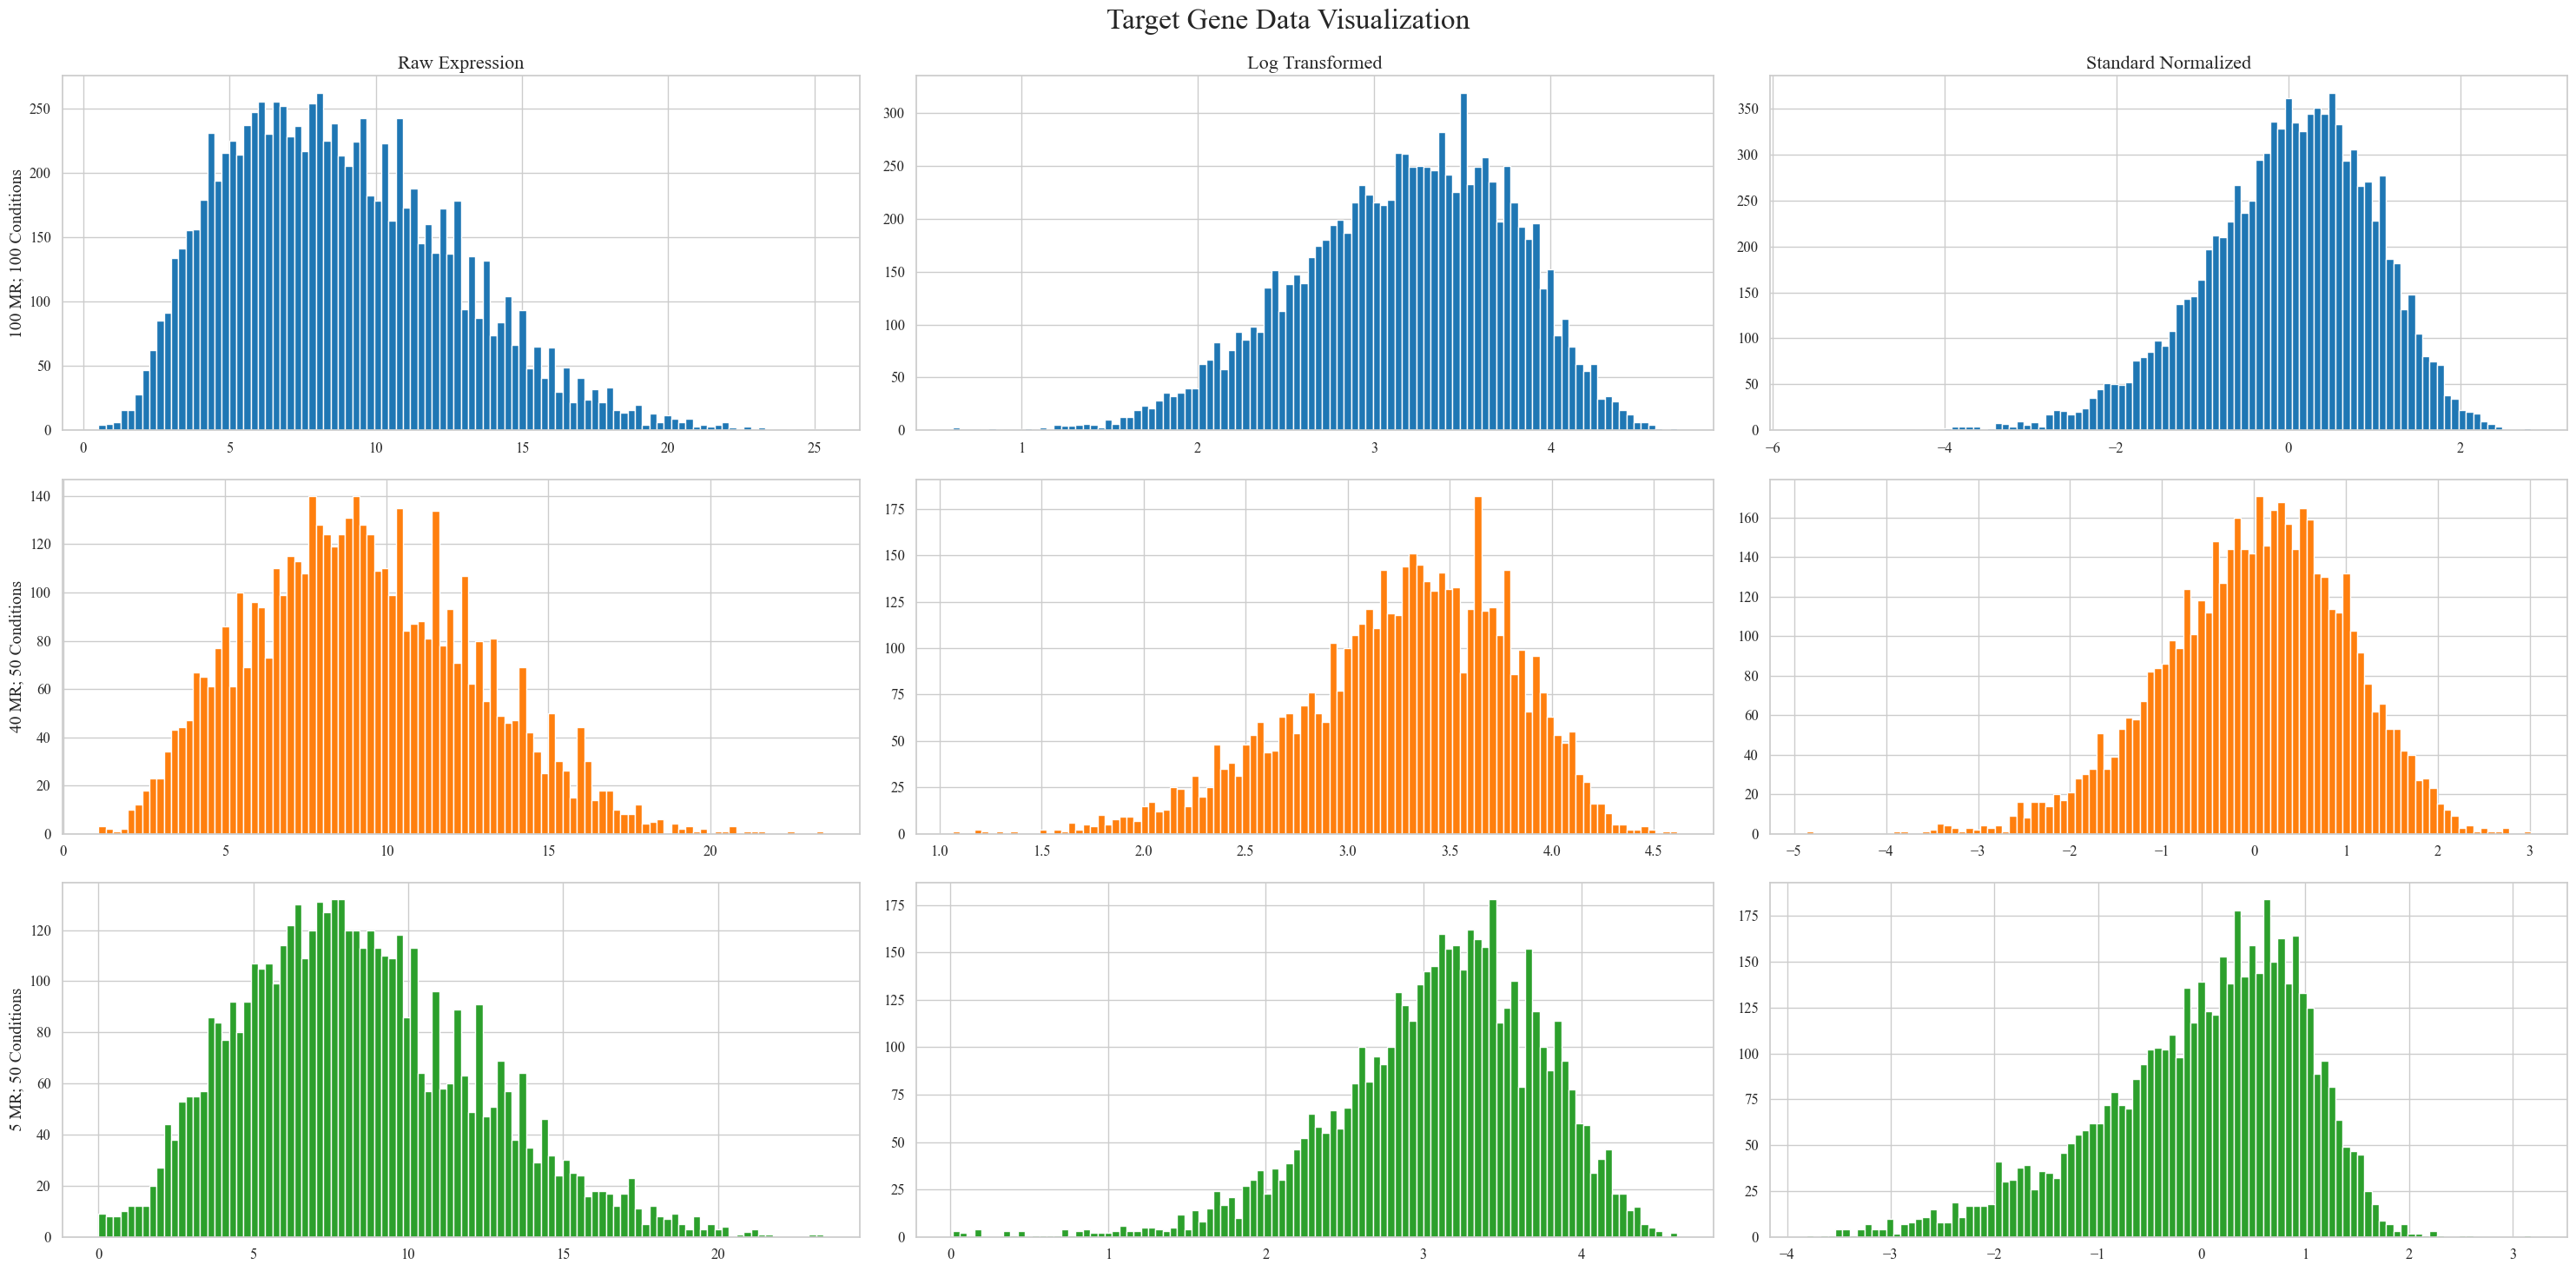

Normalized Transcription Factors for 100 MR, 40 MR, and 5 MR


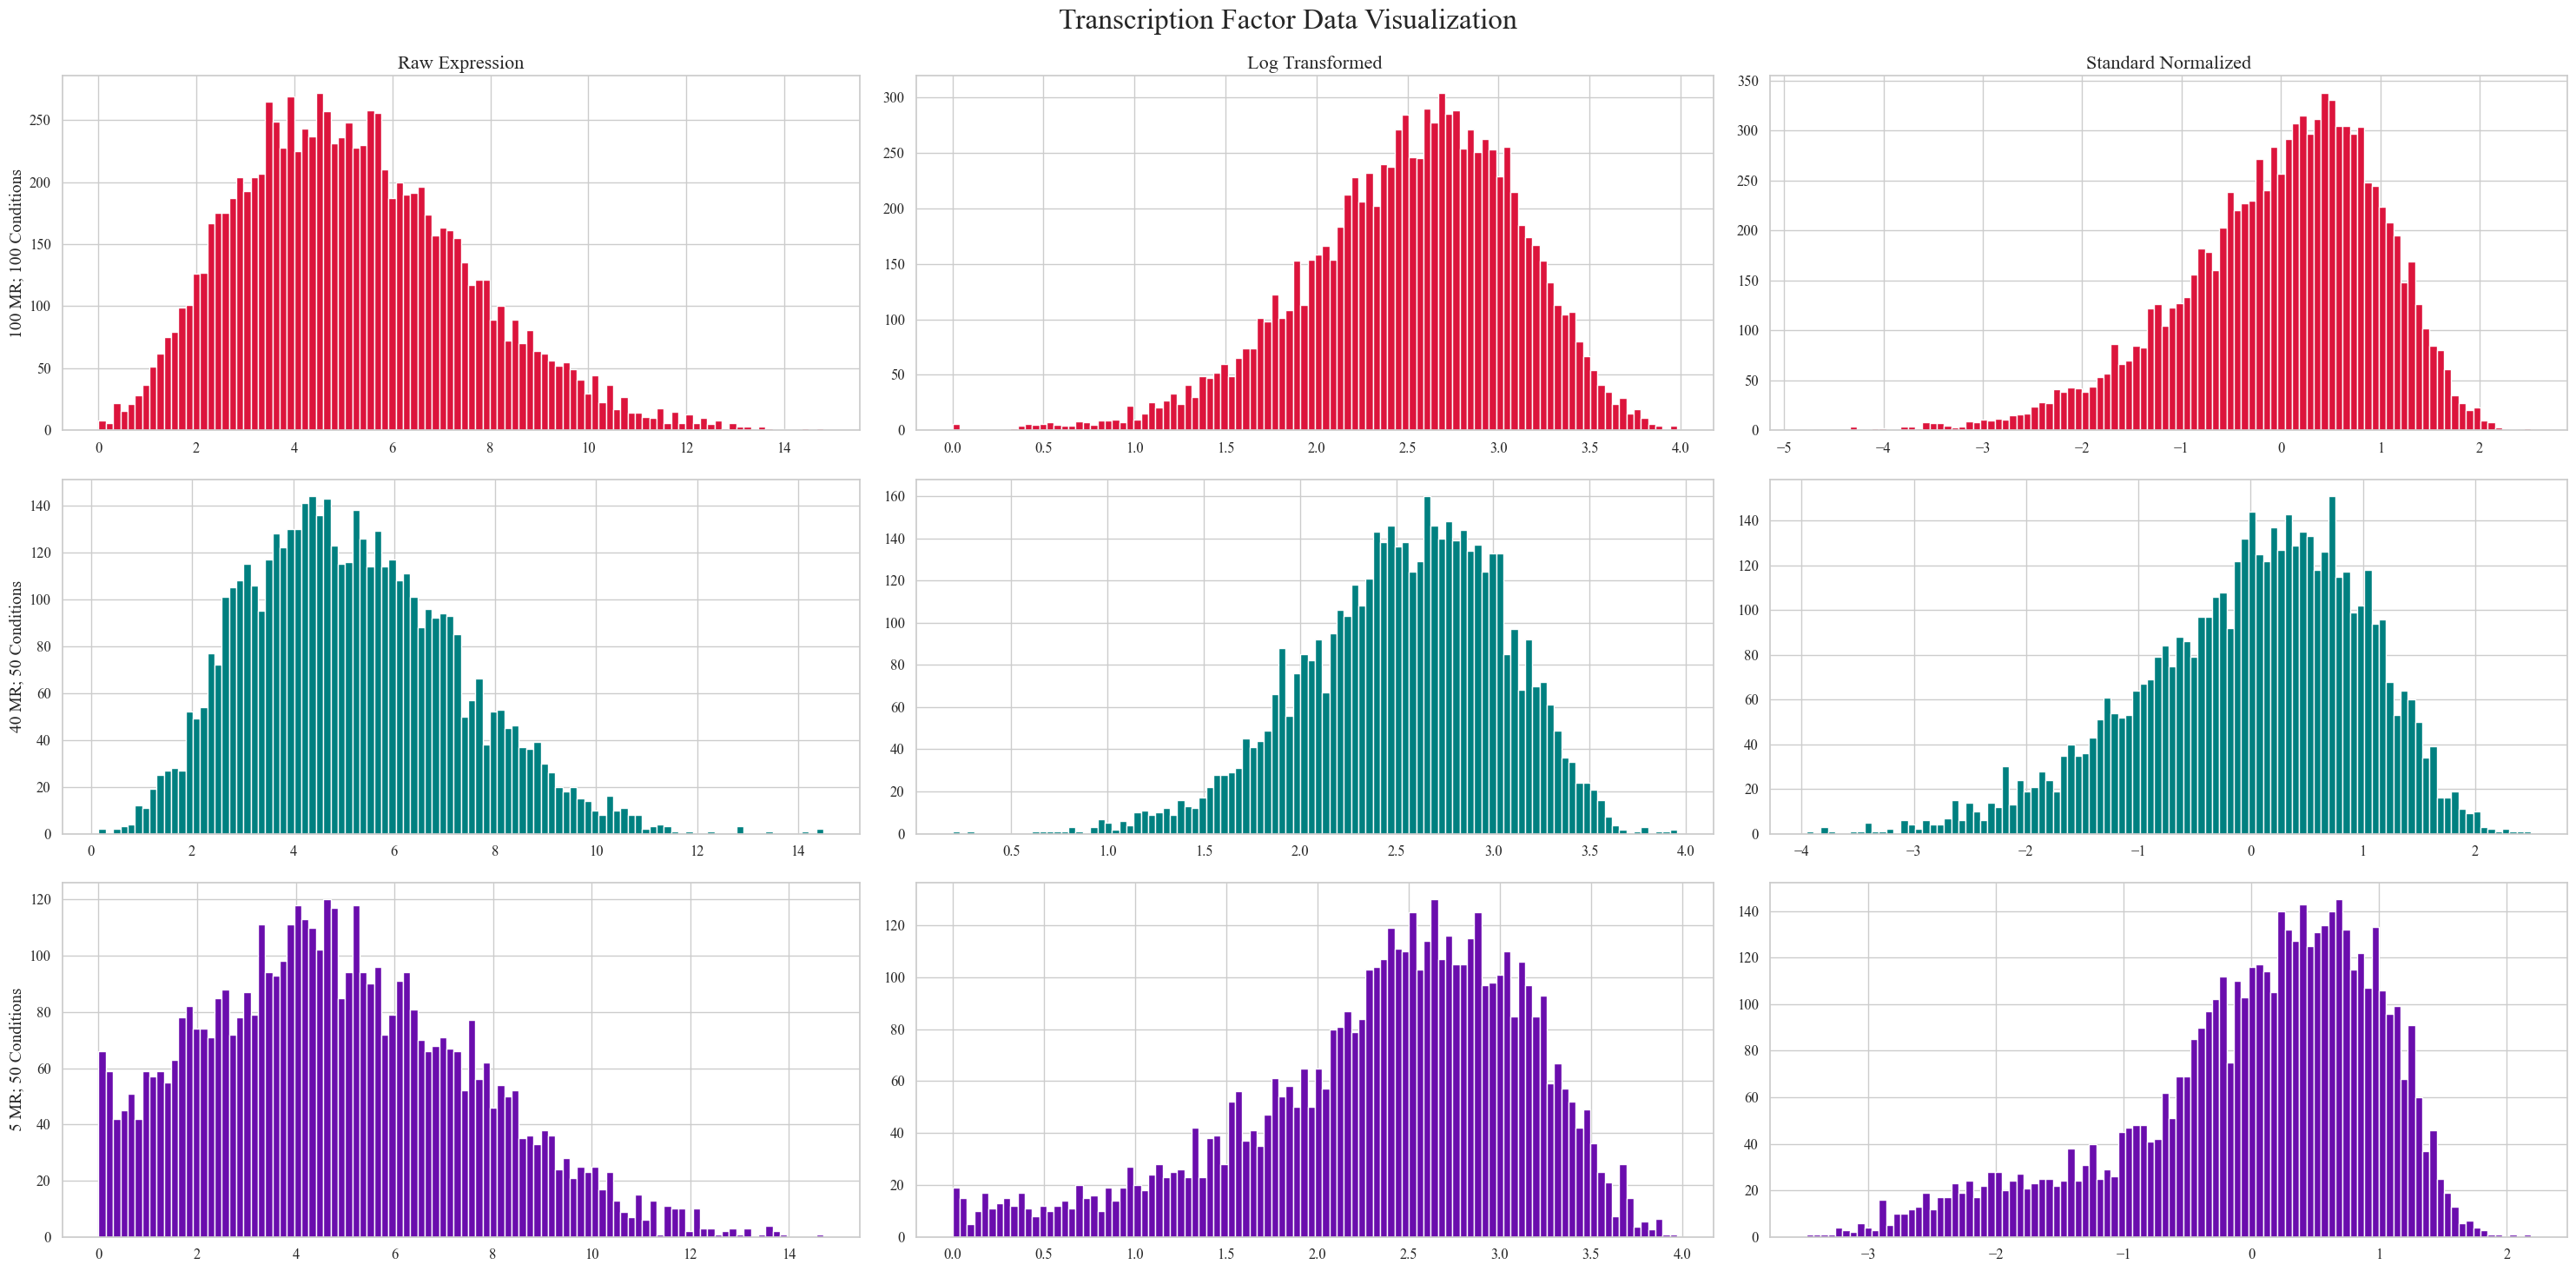

In [5]:

# Load ground truth
ground_truth_path_100mr_100cond = "../../100_mr_100_cond/bipartite_GRN.csv"
ground_truth = pd.read_csv(ground_truth_path_100mr_100cond, header=None).values

ground_truth_path_40mr = "../../40_mr_50_cond/bipartite_GRN.csv"
ground_truth40 = pd.read_csv(ground_truth_path_40mr, header=None).values

ground_truth_path_5mr = "../../5_mr_50_cond/bipartite_GRN.csv"
ground_truth5 = pd.read_csv(ground_truth_path_5mr, header=None).values

## Log Normalization
data_100_mr_100_cond_tfs_LOG = np.log2(data_100_mr_100_cond_tfs + 1)
data_100_mr_100_cond_tgs_LOG = np.log2(data_100_mr_100_cond_tgs + 1)

data_5_mr_50_cond_tfs_LOG = np.log2( data_5_mr_50_cond_tfs+ 1)
data_5_mr_50_cond_tgs_LOG = np.log2(data_5_mr_50_cond_tgs+1)

data_40_mr_50_cond_tfs_LOG = np.log2(data_40_mr_50_cond_tfs+1)
data_40_mr_50_cond_tgs_LOG = np.log2(data_40_mr_50_cond_tgs+1)


## Transform features to zero mean, 1 stdev
scaler = StandardScaler()

tf_100mr_normalized = scaler.fit_transform(data_100_mr_100_cond_tfs_LOG)
tg_100mr_nomralized = scaler.fit_transform(data_100_mr_100_cond_tgs_LOG)

tf_40mr_normalized = scaler.fit_transform(data_40_mr_50_cond_tfs_LOG)
tg_40mr_normalized = scaler.fit_transform(data_40_mr_50_cond_tgs_LOG)

tf_5mr_normalized = scaler.fit_transform(data_5_mr_50_cond_tfs_LOG)
tg_5mr_normalized = scaler.fit_transform(data_5_mr_50_cond_tgs_LOG)

print("Normalized Target Genes and TFs for 100 MR, 40 MR, and 5 MR")

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

fig, axs = plt.subplots(3, 3, figsize=(30, 15))

row_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green
# Row 1: 100 MR
axs[0, 0].hist(data_100_mr_100_cond_tgs.flatten(), bins=100, color=row_colors[0])
axs[0, 0].set_title('Raw Expression')
axs[0, 0].set_ylabel('100 MR; 100 Conditions')

axs[0, 1].hist(data_100_mr_100_cond_tgs_LOG.flatten(), bins=100, color=row_colors[0])
axs[0, 1].set_title('Log Transformed')

axs[0, 2].hist(tg_100mr_nomralized.flatten(), bins=100, color=row_colors[0])
axs[0, 2].set_title('Standard Normalized')

# Row 2: 40 MR
axs[1, 0].hist(data_40_mr_50_cond_tgs.flatten(), bins=100, color=row_colors[1])
axs[1, 0].set_ylabel('40 MR; 50 Conditions')

axs[1, 1].hist(data_40_mr_50_cond_tgs_LOG.flatten(), bins=100, color=row_colors[1])
axs[1, 2].hist(tg_40mr_normalized.flatten(), bins=100, color=row_colors[1])

# Row 3: 5 MR
axs[2, 0].hist(data_5_mr_50_cond_tgs.flatten(), bins=100, color=row_colors[2])
axs[2, 0].set_ylabel('5 MR; 50 Conditions')

axs[2, 1].hist(data_5_mr_50_cond_tgs_LOG.flatten(), bins=100, color=row_colors[2])

axs[2, 2].hist(tg_5mr_normalized.flatten(), bins=100, color=row_colors[2])
plt.suptitle('Target Gene Data Visualization', fontsize=24)
plt.tight_layout()

plt.show()

print("Normalized Transcription Factors for 100 MR, 40 MR, and 5 MR")

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

fig, axs = plt.subplots(3, 3, figsize=(30, 15))

row_colors = colors = [
          "#DC143C",  # Crimson
          "#008080",  # Teal
            "#6A0DAD" ]  # Purple

# Row 1: 100 MR
axs[0, 0].hist(data_100_mr_100_cond_tfs.flatten(), bins=100, color=row_colors[0])
axs[0, 0].set_title('Raw Expression')
axs[0, 0].set_ylabel('100 MR; 100 Conditions')

axs[0, 1].hist(data_100_mr_100_cond_tfs_LOG.flatten(), bins=100, color=row_colors[0])
axs[0, 1].set_title('Log Transformed')

axs[0, 2].hist(tf_100mr_normalized.flatten(), bins=100, color=row_colors[0])
axs[0, 2].set_title('Standard Normalized')

# Row 2: 40 MR
axs[1, 0].hist(data_40_mr_50_cond_tfs.flatten(), bins=100, color=row_colors[1])
axs[1, 0].set_ylabel('40 MR; 50 Conditions')

axs[1, 1].hist(data_40_mr_50_cond_tfs_LOG.flatten(), bins=100, color=row_colors[1])
axs[1, 2].hist(tf_40mr_normalized.flatten(), bins=100, color=row_colors[1])

# Row 3: 5 MR
axs[2, 0].hist(data_5_mr_50_cond_tfs.flatten(), bins=100, color=row_colors[2])
axs[2, 0].set_ylabel('5 MR; 50 Conditions')

axs[2, 1].hist(data_5_mr_50_cond_tfs_LOG.flatten(), bins=100, color=row_colors[2])

axs[2, 2].hist(tf_5mr_normalized.flatten(), bins=100, color=row_colors[2])
plt.suptitle('Transcription Factor Data Visualization', fontsize=24)
plt.tight_layout()

plt.show()


#### Training RF and ET

In [6]:
def train_random_forests(tf_expression, target_expression, n_estimators=750):
    
    models = []
    
    for i in range(target_expression.shape[1]):
        rf = RandomForestRegressor(n_estimators=n_estimators, bootstrap=True, random_state=42)
        rf.fit(tf_expression, target_expression[:, i])
        models.append(rf)
        if i%10==0:
            print(f"Trined model {i+1} out of {target_expression.shape[1]}")
    return models

# Train models
models_100mr = train_random_forests(tf_100mr_normalized, tg_100mr_nomralized)
models_40mr = train_random_forests(tf_40mr_normalized, tg_40mr_normalized)
models_5mr = train_random_forests(tf_5mr_normalized, tg_5mr_normalized)


Trined model 1 out of 100
Trined model 11 out of 100
Trined model 21 out of 100
Trined model 31 out of 100
Trined model 41 out of 100
Trined model 51 out of 100
Trined model 61 out of 100
Trined model 71 out of 100
Trined model 81 out of 100
Trined model 91 out of 100
Trined model 1 out of 100
Trined model 11 out of 100
Trined model 21 out of 100
Trined model 31 out of 100
Trined model 41 out of 100
Trined model 51 out of 100
Trined model 61 out of 100
Trined model 71 out of 100
Trined model 81 out of 100
Trined model 91 out of 100
Trined model 1 out of 100
Trined model 11 out of 100
Trined model 21 out of 100
Trined model 31 out of 100
Trined model 41 out of 100
Trined model 51 out of 100
Trined model 61 out of 100
Trined model 71 out of 100
Trined model 81 out of 100
Trined model 91 out of 100


In [7]:
import joblib

save_model = False
load_model = False
train_model = True

def train_extra_trees(tf_expression, target_expression, n_estimators=1000):
    
    models = []
    
    for i in range(target_expression.shape[1]):
        et = ExtraTreesRegressor(n_estimators=n_estimators, bootstrap=False, random_state=42)
        et.fit(tf_expression, target_expression[:, i])
        models.append(et)
        if i%10 == 0:
            print(f"Trined model {i+1} out of {target_expression.shape[1]}")
    return models


if train_model:
    # Train models
    models_100mr_et = train_extra_trees(tf_100mr_normalized, tg_100mr_nomralized)
    models_40mr_et = train_extra_trees(tf_40mr_normalized, tg_40mr_normalized)
    models_5mr_et = train_extra_trees(tf_5mr_normalized, tg_5mr_normalized)

if save_model:
    for model in models_100mr:
        ## Save the model
        model_path = f"100_mr_100_cond/RandomForestModel_{model}.pkl"
        with open(model_path, 'wb') as f:
            joblib.dump(model, f)

    for model in models_40mr:
        ## Save the model
        model_path = f"40_mr_50_cond/RandomForestModel_{model}.pkl"
        with open(model_path, 'wb') as f:
            joblib.dump(model, f)

    for model in models_5mr:
        ## Save the model
        model_path = f"5_mr_50_cond/RandomForestModel_{model}.pkl"
        with open(model_path, 'wb') as f:
            joblib.dump(model, f)

if load_model:
# Load the models
    models_100mr = []
    models_40mr = []
    models_5mr = []
    for i in range(100):
        model_path = f"100_mr_100_cond/RandomForestModel_{i}.pkl"
        with open(model_path, 'rb') as f:
            loaded_model = joblib.load(f)
            models_100mr.append(loaded_model)

    for i in range(100):
        model_path = f"40_mr_50_cond/RandomForestModel_{i}.pkl"
        with open(model_path, 'rb') as f:
            loaded_model = joblib.load(f)
            models_40mr.append(loaded_model)

    for i in range(100):
        model_path = f"5_mr_50_cond/RandomForestModel_{i}.pkl"
        with open(model_path, 'rb') as f:
            loaded_model = joblib.load(f)
            models_5mr.append(loaded_model)

    

Trined model 1 out of 100
Trined model 11 out of 100
Trined model 21 out of 100
Trined model 31 out of 100
Trined model 41 out of 100
Trined model 51 out of 100
Trined model 61 out of 100
Trined model 71 out of 100
Trined model 81 out of 100
Trined model 91 out of 100
Trined model 1 out of 100
Trined model 11 out of 100
Trined model 21 out of 100
Trined model 31 out of 100
Trined model 41 out of 100
Trined model 51 out of 100
Trined model 61 out of 100
Trined model 71 out of 100
Trined model 81 out of 100
Trined model 91 out of 100
Trined model 1 out of 100
Trined model 11 out of 100
Trined model 21 out of 100
Trined model 31 out of 100
Trined model 41 out of 100
Trined model 51 out of 100
Trined model 61 out of 100
Trined model 71 out of 100
Trined model 81 out of 100
Trined model 91 out of 100


## Training Lasso

In [9]:
from sklearn.linear_model import Lasso

importance_matrix_lasso_100mr = np.zeros((100, 100))
importance_matrix_lasso_40mr = np.zeros((100, 100))
importance_matrix_lasso_5mr = np.zeros((100, 100))



for i in range(0, 100):
    X = tf_100mr_normalized
    y = tg_100mr_nomralized[:, i]
    regressor = Lasso(alpha=0.04, max_iter=10000)
    regressor.fit(X, y)
    importance_matrix_lasso_100mr[:, i] = regressor.coef_

    X1 = tf_40mr_normalized
    y1 = tg_40mr_normalized[:, i]
    regressor1 = Lasso(alpha=0.02, max_iter=10000)
    regressor1.fit(X1, y1)
    importance_matrix_lasso_40mr[:, i] = regressor1.coef_

    X2 = tf_5mr_normalized
    y2 = tg_5mr_normalized[:, i]
    regressor2 = Lasso(alpha=0.02, max_iter=10000)
    regressor2.fit(X2, y2)
    importance_matrix_lasso_5mr[:, i] = regressor2.coef_

## Training Pearson

In [10]:
from scipy.stats import pearsonr

def compute_pearson_importance(tf_expression, target_expression):

    #Compute Pearson correlation coefficients as feature importances.

    n_tfs = tf_expression.shape[1]
    n_genes = target_expression.shape[1]
    importance_matrix = np.zeros((n_tfs, n_genes))

    for gene_idx in range(n_genes):
        for tf_idx in range(n_tfs):
            # Compute Pearson correlation
            corr, _ = pearsonr(tf_expression[:, tf_idx], target_expression[:, gene_idx])
            importance_matrix[tf_idx, gene_idx] = abs(corr)  # Use absolute value as importance

    return importance_matrix

importance_matrix_pearson100mr = compute_pearson_importance(tf_100mr_normalized, tg_100mr_nomralized)
importance_matrix_pearson40mr = compute_pearson_importance(tf_40mr_normalized, tg_40mr_normalized)
importance_matrix_pearson5mr = compute_pearson_importance(tf_5mr_normalized, tg_5mr_normalized)


In [11]:
def get_feature_importance_matrix(models):
    
    n_tfs = 100
    n_targets = 100
    
    importance_matrix = np.zeros((n_tfs, n_targets))
    
    ## The column is feature importances for a specific gene, rows correspond to each gene
    for i, model in enumerate(models):
        importance_matrix[:, i] = model.feature_importances_
        
    return importance_matrix


# Get importance matrix
importance_matrix = get_feature_importance_matrix(models_100mr)
importance_matrix_rf_40mr = get_feature_importance_matrix(models_40mr)
importance_matrix_rf_5mr = get_feature_importance_matrix(models_5mr)

importance_matrix_et = get_feature_importance_matrix(models_100mr_et)
importance_matrix_et_40mr = get_feature_importance_matrix(models_40mr_et)
importance_matrix_et_5mr = get_feature_importance_matrix(models_5mr_et)
# Normalize_importance_matrix with respect to columns (columns are genes, rows are TFs, cells are importance scores):

ranked_scores = {}
for gene_index in range(importance_matrix.shape[1]):
    scores = importance_matrix[:, gene_index]
    ## Create list of tuples
    tf_scores = [(tf_index, score) for tf_index, score in enumerate(scores)]
    ranked_tf_scores = sorted(tf_scores, key=lambda x: x[1], reverse=True)
    ranked_scores[gene_index + 100] = ranked_tf_scores  # Gene indices are 100-199

#for i in range(100):
    #print(f"Gene {i+100}: {ranked_scores[i+100]}")





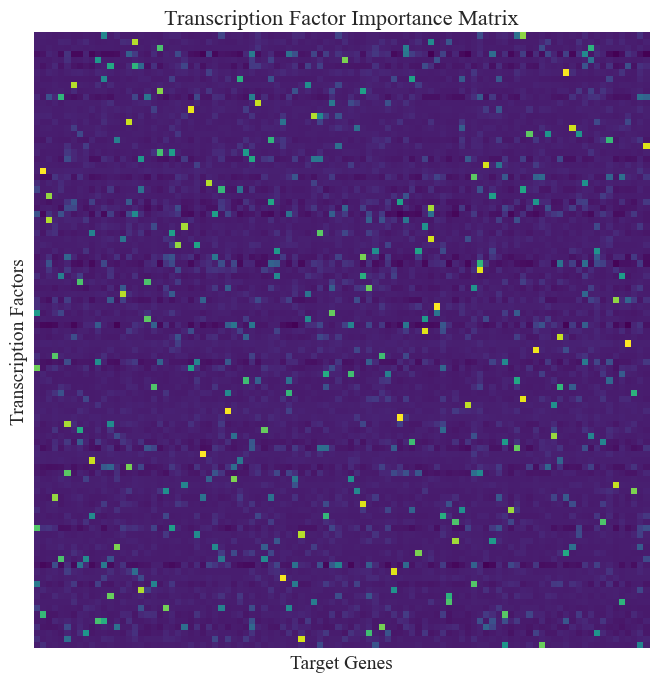

In [12]:
# Assuming `importance_matrix` is your feature importance matrix
plt.figure(figsize=(12, 8))

sns.heatmap(scaler.fit_transform(importance_matrix.T).T
,cbar=False, cmap='viridis', annot=False,  square=True, xticklabels=False, yticklabels=False)
plt.title('Transcription Factor Importance Matrix')
plt.xlabel('Target Genes')
plt.ylabel('Transcription Factors')
plt.show()

### Calculate AUROC Scores

Average AUROC Score 100 mr: 0.9071406745428438
Average AUROC Score et 100 mr: 0.9130154045395968
Average AURROC Score Pearson 100 mr: 0.9183777088638881
Average AUROC Score Lasso 100 mr: 0.7856877192590933
Average AUROC Score 40 mr: 0.8410428756645029
Average AUROC Score et 40 mr ET: 0.8448011792302901
Average AUROC Score Pearson 40 mr: 0.8444444956823758
Average AUROC Score Lasso 40 mr: 0.7205467937769909
Average AUROC Score 5 mr: 0.6707080855518389
Average AUROC Score et 5 mr: 0.6909773034072002
Average AUROC Score Pearson 5 mr: 0.6675478022380736
Average AUROC Score Lasso 5 mr: 0.7095347733505747
Array saved as output.csv


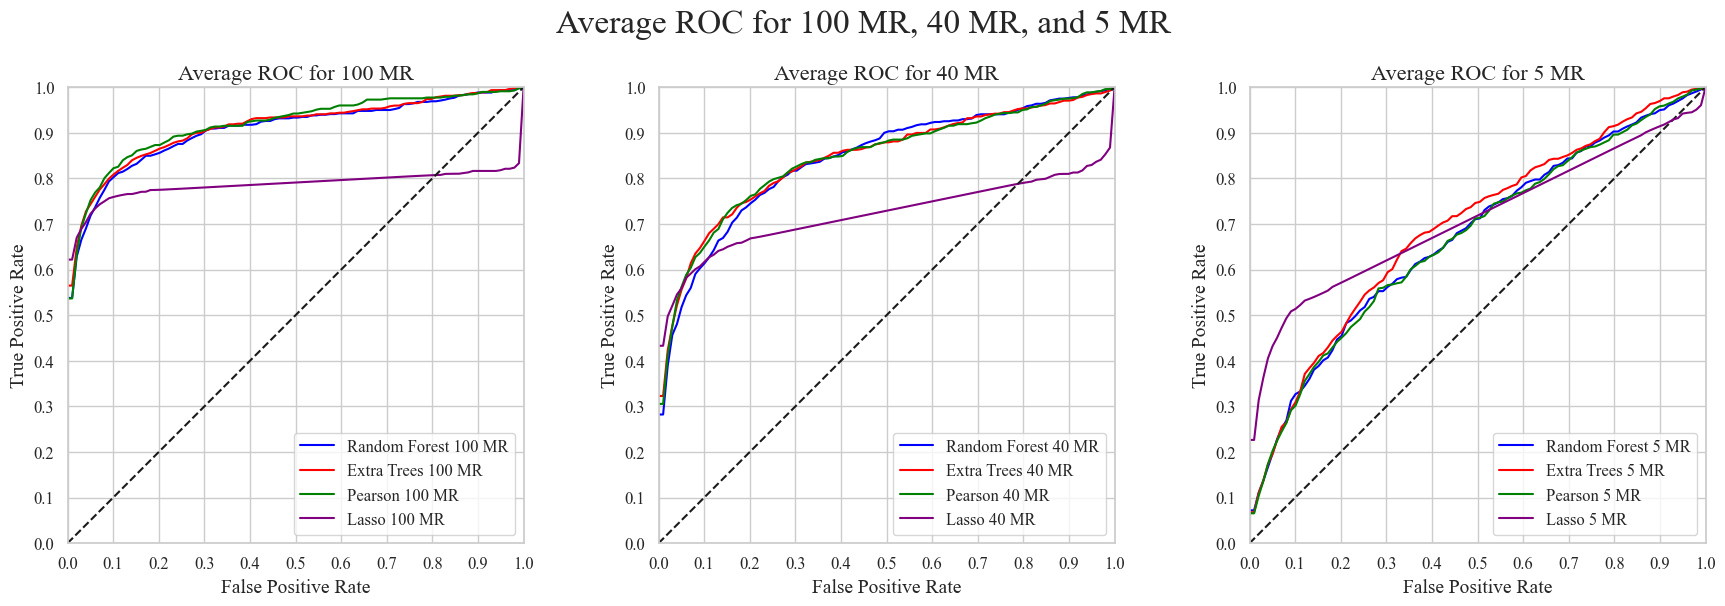

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from scipy.interpolate import interp1d


def create_adjacency_matrix(edge_list, n_tfs, n_targets):
    adj_matrix = np.zeros((n_tfs, n_targets))
    for tf, target in edge_list:
        adj_matrix[int(tf), int(target-100)] = 1
    return adj_matrix

def get_auc_scores(importance, gt):
    aucs = np.zeros((100,1))
    fpr_standard = np.linspace(0, 1, 100)
    tprs = np.zeros((100,100))
    # Loop through each gene (column) in the importance matrix
    for i in range(100):
        gt_i = gt[:,i]
        importance_i = importance[:,i]
        aucs[i] = roc_auc_score(gt_i, importance_i)
        
        fpr, tpr, thresholds = roc_curve(gt_i, importance_i)  
        interp = interp1d(fpr, tpr, kind='linear', bounds_error=False, fill_value=0)
        tpr_interpolated = interp(fpr_standard)
        tprs[:,i] = tpr_interpolated

    return aucs, tprs



ground_truth_matrix = create_adjacency_matrix(ground_truth, 100, 100)
ground_truth_matrix40mr = create_adjacency_matrix(ground_truth40, 100,100)
ground_truth_matrix5mr = create_adjacency_matrix(ground_truth5, 100, 100)

auc_scores, tprsRF100 = get_auc_scores(importance_matrix, ground_truth_matrix)
auc_scores_ets, tprsET100 = get_auc_scores(importance_matrix_et, ground_truth_matrix)
auc_rf_40, tprsRF40 = get_auc_scores(importance_matrix_rf_40mr, ground_truth_matrix40mr)
auc_rf_5, tprsRF5 = get_auc_scores(importance_matrix_rf_5mr, ground_truth_matrix5mr)
auc_et_40, tprsET40 = get_auc_scores(importance_matrix_et_40mr, ground_truth_matrix40mr)
auc_et_5, tprsET5 = get_auc_scores(importance_matrix_et_5mr, ground_truth_matrix5mr)

## Pearson AUC scores
auc_pearson_100mr, tprsPearson100 = get_auc_scores(importance_matrix_pearson100mr, ground_truth_matrix)
auc_pearson_40mr, tprsPearson40 = get_auc_scores(importance_matrix_pearson40mr, ground_truth_matrix40mr)
auc_pearson_5mr, tprsPearson5 = get_auc_scores(importance_matrix_pearson5mr, ground_truth_matrix5mr)

## Lasso AUC scores
auc_lasso_100mr, tprsLasso100 = get_auc_scores(importance_matrix_lasso_100mr, ground_truth_matrix)
auc_lasso_40mr, tprsLasso40 = get_auc_scores(importance_matrix_lasso_40mr, ground_truth_matrix40mr)
auc_lasso_5mr, tprsLasso5 = get_auc_scores(importance_matrix_lasso_5mr, ground_truth_matrix5mr)

print(f"Average AUROC Score 100 mr: {np.mean(auc_scores)}")
print(f"Average AUROC Score et 100 mr: {np.mean(auc_scores_ets)}")
print(f"Average AURROC Score Pearson 100 mr: {np.mean(auc_pearson_100mr)}")
print(f"Average AUROC Score Lasso 100 mr: {np.mean(auc_lasso_100mr)}")
print(f"Average AUROC Score 40 mr: {np.mean(auc_rf_40)}")
print(f"Average AUROC Score et 40 mr ET: {np.mean(auc_et_40)}")
print(f"Average AUROC Score Pearson 40 mr: {np.mean(auc_pearson_40mr)}")
print(f"Average AUROC Score Lasso 40 mr: {np.mean(auc_lasso_40mr)}")
print(f"Average AUROC Score 5 mr: {np.mean(auc_rf_5)}")
print(f"Average AUROC Score et 5 mr: {np.mean(auc_et_5)}")
print(f"Average AUROC Score Pearson 5 mr: {np.mean(auc_pearson_5mr)}")
print(f"Average AUROC Score Lasso 5 mr: {np.mean(auc_lasso_5mr)}")



# Save the array as a CSV file
np.savetxt("Resulting_auc/auc_scores_RF_100.csv", auc_scores, delimiter=",", fmt="%.5f", comments="")
np.savetxt("Resulting_auc/auc_scores_RF_40.csv", auc_rf_40, delimiter=",", fmt="%.5f", comments="")
np.savetxt("Resulting_auc/auc_scores_RF_5.csv", auc_rf_5, delimiter=",", fmt="%.5f", comments="")
np.savetxt("Resulting_auc/auc_scores_ET_100.csv", auc_scores_ets, delimiter=",", fmt="%.5f", comments="")
np.savetxt("Resulting_auc/auc_scores_ET_40.csv", auc_et_40, delimiter=",", fmt="%.5f", comments="")
np.savetxt("Resulting_auc/auc_scores_ET_5.csv", auc_et_5, delimiter=",", fmt="%.5f", comments="")

print("Array saved as output.csv")
fpr_standard = np.linspace(0, 1, 100)
average_tpr_rf_100 = np.mean(tprsRF100, axis=1)
average_tpr_rf_40 = np.mean(tprsRF40, axis=1)
average_tpr_rf_5 = np.mean(tprsRF5, axis=1)

average_tpr_et_100 = np.mean(tprsET100, axis=1)
average_tpr_et_40 = np.mean(tprsET40, axis=1)
average_tpr_et_5 = np.mean(tprsET5, axis=1)

average_tpr_pearson_100 = np.mean(tprsPearson100, axis=1)
average_tpr_pearson_40 = np.mean(tprsPearson40, axis=1)
average_tpr_pearson_5 = np.mean(tprsPearson5, axis=1)

average_tpr_lasso_100 = np.mean(tprsLasso100, axis=1)
average_tpr_lasso_40 = np.mean(tprsLasso40, axis=1)
average_tpr_lasso_5 = np.mean(tprsLasso5, axis=1)
# Plotting the AUC scores for 100 MR, 40 MR, and 5 MR
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

axs[0].plot(fpr_standard, average_tpr_rf_100, color='blue', label='Random Forest 100 MR')
axs[0].plot(fpr_standard, average_tpr_et_100, color='red', label='Extra Trees 100 MR')
axs[0].plot(fpr_standard, average_tpr_pearson_100, color='green', label='Pearson 100 MR')
axs[0].plot(fpr_standard, average_tpr_lasso_100, color='purple', label='Lasso 100 MR')
axs[0].plot([0, 1], [0, 1], 'k--')  # Diagonal dashed line
axs[0].set_title('Average ROC for 100 MR')  
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend()
axs[0].set_xlim([0, 1])
axs[0].set_ylim([0, 1])
axs[0].set_aspect('equal', adjustable='box')
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(0, 1.1, 0.1))
axs[0].set_xticklabels(np.round(np.arange(0, 1.1, 0.1), 2))
axs[0].set_yticklabels(np.round(np.arange(0, 1.1, 0.1), 2))

axs[1].plot(fpr_standard, average_tpr_rf_40, color='blue', label='Random Forest 40 MR')
axs[1].plot(fpr_standard, average_tpr_et_40, color='red', label='Extra Trees 40 MR')
axs[1].plot(fpr_standard, average_tpr_pearson_40, color='green', label='Pearson 40 MR')
axs[1].plot(fpr_standard, average_tpr_lasso_40, color='purple', label='Lasso 40 MR')
axs[1].plot([0, 1], [0, 1], 'k--')  # Diagonal dashed line
axs[1].set_title('Average ROC for 40 MR')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend()
axs[1].set_xlim([0, 1])
axs[1].set_ylim([0, 1])
axs[1].set_aspect('equal', adjustable='box')
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].set_xticklabels(np.round(np.arange(0, 1.1, 0.1), 2))
axs[1].set_yticklabels(np.round(np.arange(0, 1.1, 0.1), 2))

axs[2].plot(fpr_standard, average_tpr_rf_5, color='blue', label='Random Forest 5 MR')
axs[2].plot(fpr_standard, average_tpr_et_5, color='red', label='Extra Trees 5 MR')
axs[2].plot(fpr_standard, average_tpr_pearson_5, color='green', label='Pearson 5 MR')
axs[2].plot([0, 1], [0, 1], 'k--')  # Diagonal dashed line
axs[2].plot(fpr_standard, average_tpr_lasso_5, color='purple', label='Lasso 5 MR')
axs[2].set_title('Average ROC for 5 MR')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].legend(loc='lower right')
axs[2].set_xlim([0, 1])
axs[2].set_ylim([0, 1])
axs[2].set_aspect('equal', adjustable='box')
axs[2].set_xticks(np.arange(0, 1.1, 0.1))
axs[2].set_yticks(np.arange(0, 1.1, 0.1))
axs[2].set_xticklabels(np.round(np.arange(0, 1.1, 0.1), 2))
axs[2].set_yticklabels(np.round(np.arange(0, 1.1, 0.1), 2))

plt.tight_layout()
plt.suptitle('Average ROC for 100 MR, 40 MR, and 5 MR', fontsize=24)
plt.subplots_adjust(top=0.85)  # Adjust the top margin to make room for the title
plt.show()


## Attempt Combination of Pearson Correlation and Random Trees

In [14]:
from scipy.stats import pearsonr

def compute_pearson_importance(tf_expression, target_expression):

    #Compute Pearson correlation coefficients as feature importances.

    n_tfs = tf_expression.shape[1]
    n_genes = target_expression.shape[1]
    importance_matrix = np.zeros((n_tfs, n_genes))

    for gene_idx in range(n_genes):
        for tf_idx in range(n_tfs):
            # Compute Pearson correlation
            corr, _ = pearsonr(tf_expression[:, tf_idx], target_expression[:, gene_idx])
            importance_matrix[tf_idx, gene_idx] = abs(corr)  # Use absolute value as importance

    return importance_matrix

importance_matrix_pearson100mr = compute_pearson_importance(tf_100mr_normalized, tg_100mr_nomralized)
importance_matrix_pearson40mr = compute_pearson_importance(tf_40mr_normalized, tg_40mr_normalized)
importance_matrix_pearson5mr = compute_pearson_importance(tf_5mr_normalized, tg_5mr_normalized)


auc_pearson_100,_ = get_auc_scores(importance_matrix_pearson100mr, ground_truth_matrix)
auc_pearson_40,_ = get_auc_scores(importance_matrix_pearson40mr, ground_truth_matrix40mr)
auc_pearson_5,_ = get_auc_scores(importance_matrix_pearson5mr, ground_truth_matrix5mr)
print(f"Average AUROC Score Pearson 100 mr: {np.mean(auc_pearson_100)}")
print(f"Average AUROC Score Pearson 40 mr: {np.mean(auc_pearson_40)}")
print(f"Average AUROC Score Pearson 5 mr: {np.mean(auc_pearson_5)}")


Average AUROC Score Pearson 100 mr: 0.9183777088638881
Average AUROC Score Pearson 40 mr: 0.8444444956823758
Average AUROC Score Pearson 5 mr: 0.6675478022380736


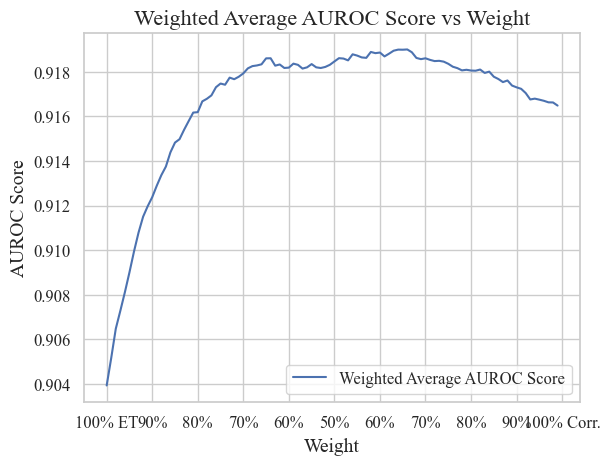

Best AUROC Score: 0.9190045434615507
Best Weight: 0.66


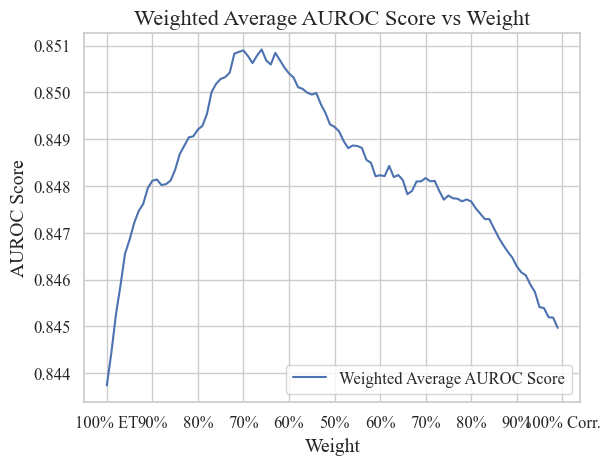

Best AUROC Score: 0.8509183032642501
Best Weight: 0.34


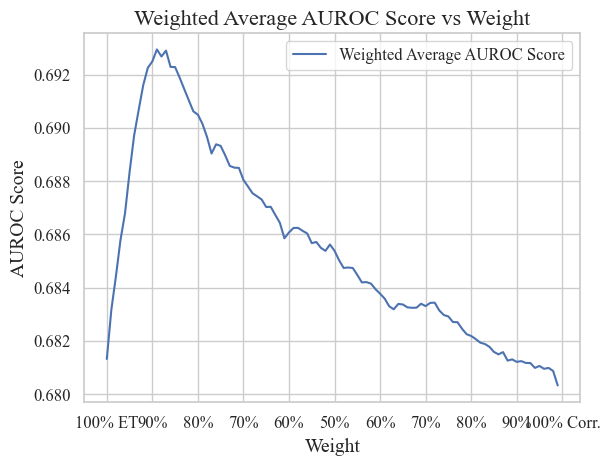

Best AUROC Score: 0.692943801849314
Best Weight: 0.11


In [15]:
## Normalize columns of every importance matrix
normalized_importance_matrix_pearson100mr = scaler.fit_transform(importance_matrix_pearson100mr.T).T
normalized_importance_matrix_pearson40mr = scaler.fit_transform(importance_matrix_pearson40mr.T).T
normalized_importance_matrix_pearson5mr = scaler.fit_transform(importance_matrix_pearson5mr.T).T
normalized_importance_matrix_et100mr = scaler.fit_transform(importance_matrix_et.T).T
normalized_importance_matrix_et40mr = scaler.fit_transform(importance_matrix_et_40mr.T).T
normalized_importance_matrix_et5mr = scaler.fit_transform(importance_matrix_et_5mr.T).T 

average_auroc_scores = np.zeros((100, 1))
best_auc = 0
best_weight = 0
for weight in range(100):
    
    weight1 = weight/100
    weight2 = 1 - weight1
## Weighted Average Importance Scores
    importance_100mr = (weight1 * normalized_importance_matrix_pearson100mr) + (weight2 * normalized_importance_matrix_et100mr)
    auc_combined_100mr,_ = get_auc_scores(importance_100mr, ground_truth_matrix)
    average_auroc_scores[weight] = np.mean(auc_combined_100mr)


    if np.mean(auc_combined_100mr) > best_auc:
        best_auc = np.mean(auc_combined_100mr)
        best_weight = weight1

average_auroc_scores1 = np.zeros((100, 1))
best_auc1 = 0
best_weight1 = 0
for weight in range(100):
    weight1 = weight/100
    weight2 = 1 - weight1
    importance_40mr = (weight1 * normalized_importance_matrix_pearson40mr) + (weight2 * normalized_importance_matrix_et40mr)
    auc_combined_40mr,_ = get_auc_scores(importance_40mr, ground_truth_matrix40mr)
    average_auroc_scores1[weight] = np.mean(auc_combined_40mr)

    if np.mean(auc_combined_40mr) > best_auc1:
        best_auc1 = np.mean(auc_combined_40mr)
        best_weight1 = weight1

average_auroc_scores2 = np.zeros((100, 1))
best_auc2 = 0
best_weight2 = 0
for weight in range(100):
    weight1 = weight/100
    weight2 = 1 - weight1
    importance_5mr = (weight1 * normalized_importance_matrix_pearson5mr) + (weight2 * normalized_importance_matrix_et5mr)
    auc_combined_5mr,_ = get_auc_scores(importance_5mr, ground_truth_matrix5mr)
    average_auroc_scores2[weight] = np.mean(auc_combined_5mr)
    if np.mean(auc_combined_5mr) > best_auc2:
        best_auc2 = np.mean(auc_combined_5mr)
        best_weight2 = weight1


plt.plot(average_auroc_scores, label='Weighted Average AUROC Score')
plt.xlabel('Weight')
plt.ylabel('AUROC Score')
plt.title('Weighted Average AUROC Score vs Weight')
plt.xticks(
    ticks=np.arange(0, 101, 10),  # Tick positions (0 to 100 in increments of 10)
    labels=[
        '100% ET', '90%', '80%', '70%', '60%', '50%', 
        '60%', '70%', '80%', '90%', '100% Corr.'
    ]
)
plt.legend()
plt.show()

print(f"Best AUROC Score: {best_auc}")
print(f"Best Weight: {best_weight}")

plt.plot(average_auroc_scores1, label='Weighted Average AUROC Score')
plt.xlabel('Weight')
plt.ylabel('AUROC Score')
plt.title('Weighted Average AUROC Score vs Weight')
plt.xticks(
    ticks=np.arange(0, 101, 10),
    labels=[
        '100% ET', '90%', '80%', '70%', '60%', '50%', 
        '60%', '70%', '80%', '90%', '100% Corr.'
    ]
)
plt.legend()
plt.show()

print(f"Best AUROC Score: {best_auc1}")
print(f"Best Weight: {best_weight1}")

plt.plot(average_auroc_scores2, label='Weighted Average AUROC Score')
plt.xlabel('Weight')
plt.ylabel('AUROC Score')
plt.title('Weighted Average AUROC Score vs Weight')
plt.xticks(
    ticks=np.arange(0, 101, 10),
    labels=[
        '100% ET', '90%', '80%', '70%', '60%', '50%', 
        '60%', '70%', '80%', '90%', '100% Corr.'
    ]
)
plt.legend()
plt.show()

print(f"Best AUROC Score: {best_auc2}")
print(f"Best Weight: {best_weight2}")

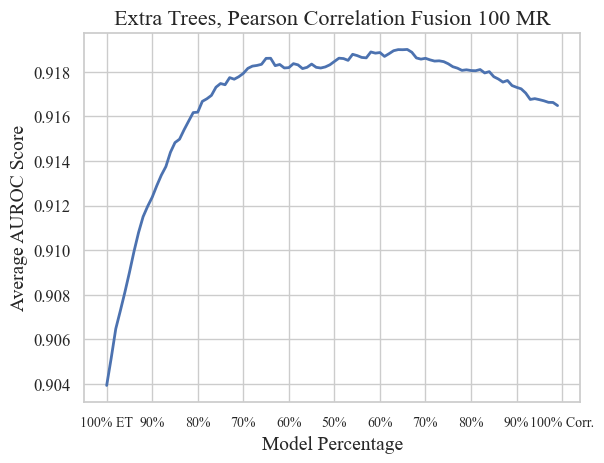

Best AUROC Score: 0.9190045434615507
Best Weight: 0.66


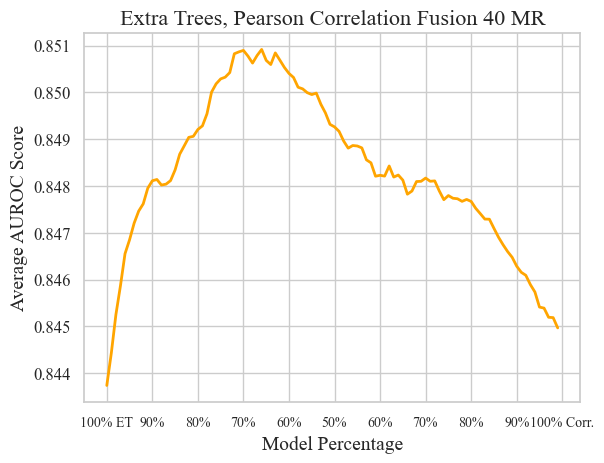

Best AUROC Score: 0.8509183032642501
Best Weight: 0.34


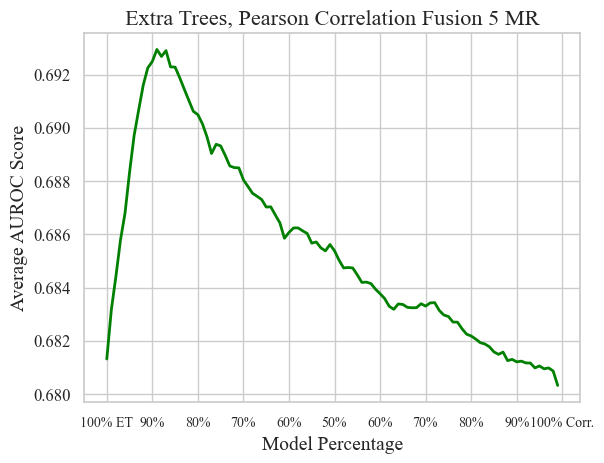

Best AUROC Score: 0.692943801849314
Best Weight: 0.11


In [16]:
plt.plot(average_auroc_scores, label='Weighted Average AUROC Score', linewidth=2)
plt.xlabel('Model Percentage')
plt.ylabel('Average AUROC Score')
plt.title('Extra Trees, Pearson Correlation Fusion 100 MR')
plt.xticks(
    ticks=np.arange(0, 101, 10),  # Tick positions (0 to 100 in increments of 10)
    labels=[
        '100% ET', '90%', '80%', '70%', '60%', '50%', 
        '60%', '70%', '80%', '90%', '100% Corr.'
    ], fontsize=10
)
plt.show()

print(f"Best AUROC Score: {best_auc}")
print(f"Best Weight: {best_weight}")

plt.plot(average_auroc_scores1, label='Weighted Average AUROC Score', linewidth=2, color = 'orange')
plt.xlabel('Model Percentage')
plt.ylabel('Average AUROC Score')
plt.title('Extra Trees, Pearson Correlation Fusion 40 MR')
plt.xticks(
    ticks=np.arange(0, 101, 10),
    labels=[
        '100% ET', '90%', '80%', '70%', '60%', '50%', 
        '60%', '70%', '80%', '90%', '100% Corr.'
    ], fontsize=10
)
plt.show()

print(f"Best AUROC Score: {best_auc1}")
print(f"Best Weight: {best_weight1}")

plt.plot(average_auroc_scores2, label='Weighted Average AUROC Score', linewidth=2, color = 'green')
plt.xlabel('Model Percentage')
plt.ylabel('Average AUROC Score')
plt.title('Extra Trees, Pearson Correlation Fusion 5 MR')
plt.xticks(
    ticks=np.arange(0, 101, 10),
    labels=[
        '100% ET', '90%', '80%', '70%', '60%', '50%', 
        '60%', '70%', '80%', '90%', '100% Corr.'
    ], fontsize=10
)
plt.show()

print(f"Best AUROC Score: {best_auc2}")
print(f"Best Weight: {best_weight2}")

#### Violin Plots

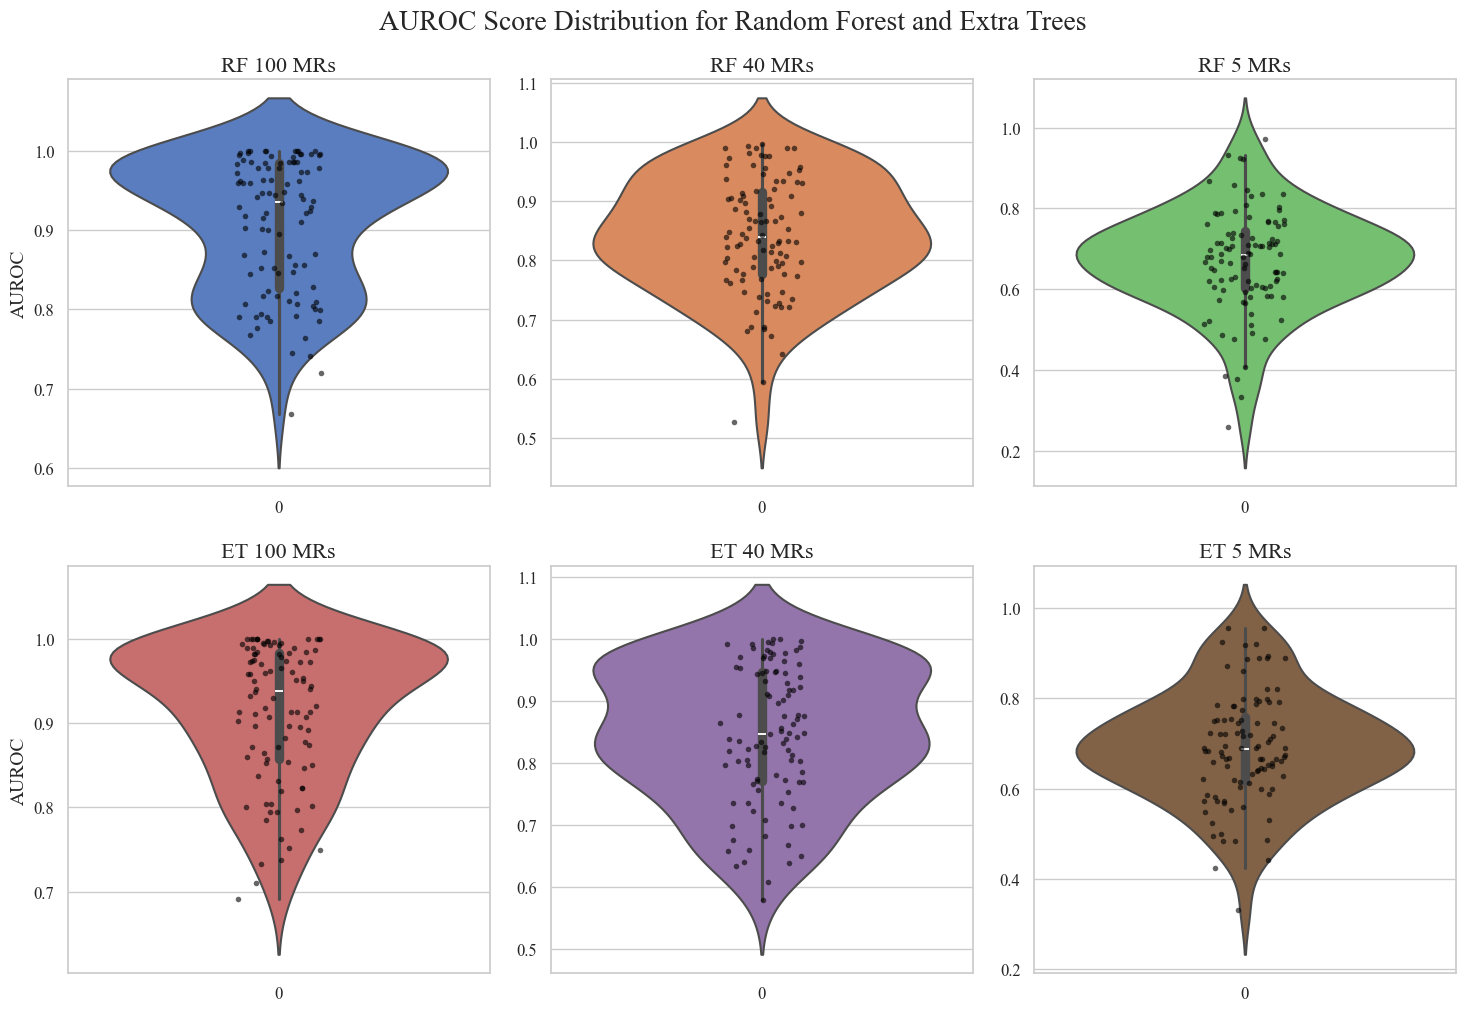

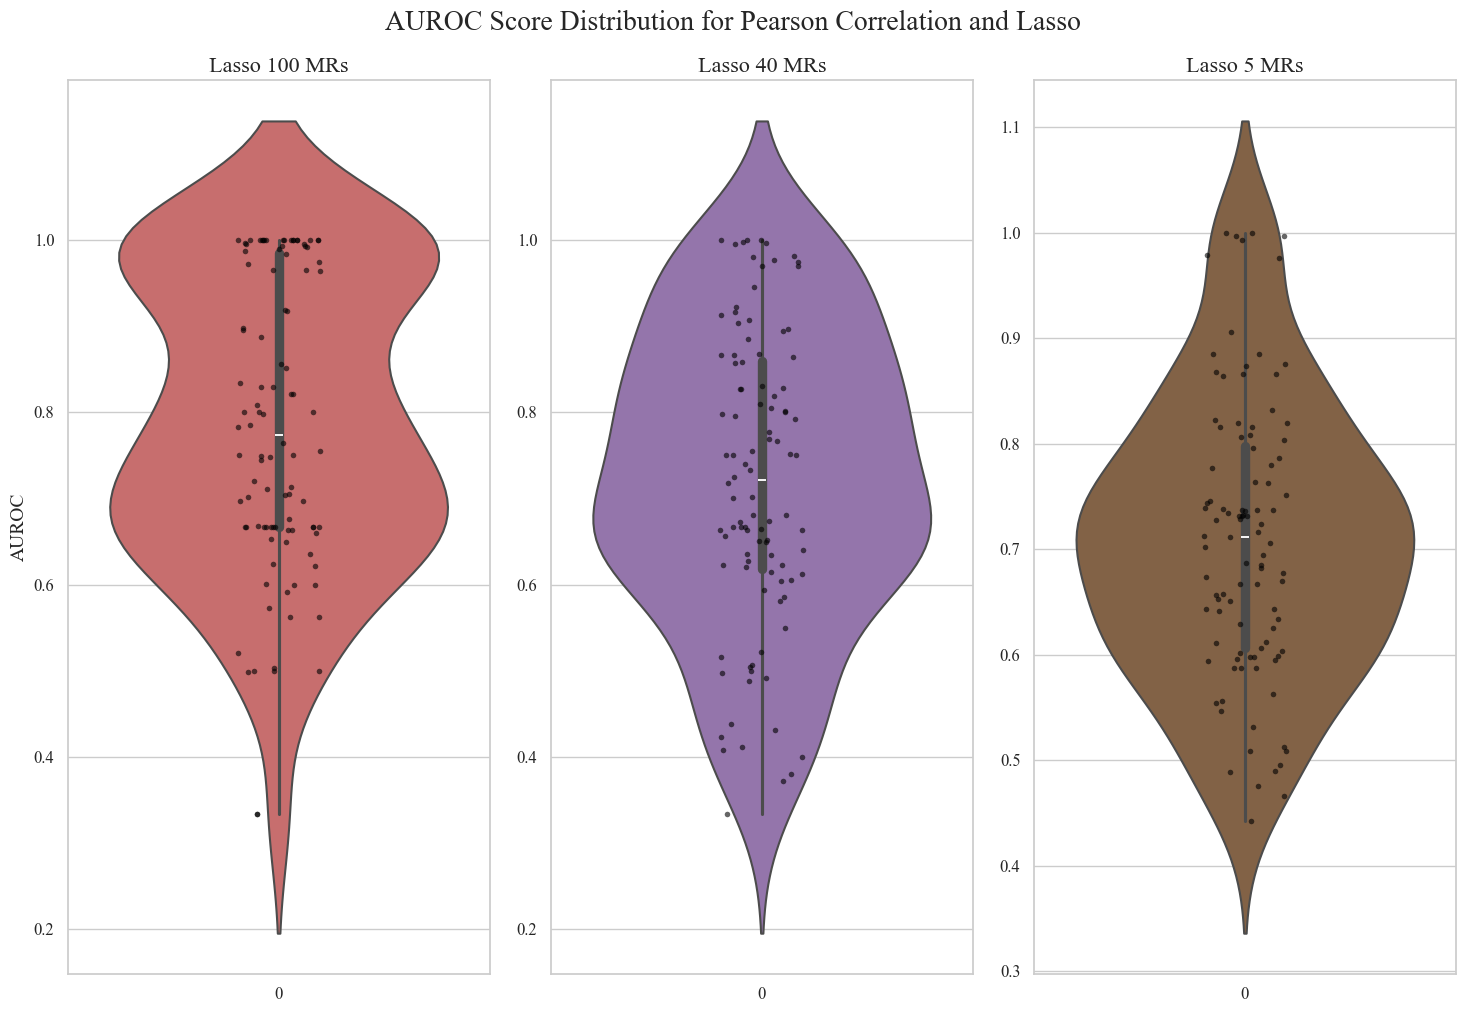

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})
colors = sns.color_palette("muted", 6)


fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Plot violin plots in each subplot
sns.violinplot(data=auc_scores, ax=axs[0, 0], color=colors[0], linewidth=1.5)
sns.stripplot(data=auc_scores, ax=axs[0, 0], color="black", size=4, jitter=True, alpha=0.6)
axs[0, 0].set_title("RF 100 MRs")
axs[0, 0].set_ylabel("AUROC")


sns.violinplot(data=auc_rf_40, ax=axs[0, 1], color=colors[1], linewidth=1.5)
sns.stripplot(data=auc_rf_40, ax=axs[0, 1], color="black", size=4, jitter=True, alpha=0.6)
axs[0, 1].set_title("RF 40 MRs")

sns.violinplot(data=auc_rf_5, ax=axs[0, 2], color=colors[2], linewidth=1.5)
sns.stripplot(data=auc_rf_5, ax=axs[0, 2], color="black", size=4, jitter=True, alpha=0.6)
axs[0, 2].set_title("RF 5 MRs")

sns.violinplot(data=auc_scores_ets, ax=axs[1, 0], color=colors[3], linewidth=1.5)
sns.stripplot(data=auc_scores_ets, ax=axs[1, 0], color="black", size=4, jitter=True, alpha=0.6)
axs[1, 0].set_ylabel("AUROC")
axs[1, 0].set_title("ET 100 MRs")

sns.violinplot(data=auc_et_40, ax=axs[1, 1], color=colors[4], linewidth=1.5)
sns.stripplot(data=auc_et_40, ax=axs[1, 1], color="black", size=4, jitter=True, alpha=0.6)
axs[1, 1].set_title("ET 40 MRs")

sns.violinplot(data=auc_et_5, ax=axs[1, 2], color=colors[5], linewidth=1.5)
sns.stripplot(data=auc_et_5, ax=axs[1, 2], color="black", size=4, jitter=True, alpha=0.6)
axs[1, 2].set_title("ET 5 MRs")

plt.tight_layout()
plt.suptitle("AUROC Score Distribution for Random Forest and Extra Trees", fontsize=20, y=1.02)
plt.show()
 
fig, axs = plt.subplots(1, 3, figsize=(15, 10))  # 2 rows, 3 columns

sns.violinplot(data=auc_lasso_100mr, ax=axs[0], color=colors[3], linewidth=1.5)
sns.stripplot(data=auc_lasso_100mr, ax=axs[0], color="black", size=4, jitter=True, alpha=0.6)
axs[0].set_ylabel("AUROC")
axs[0].set_title("Lasso 100 MRs")

sns.violinplot(data=auc_lasso_40mr, ax=axs[1], color=colors[4], linewidth=1.5)
sns.stripplot(data=auc_lasso_40mr, ax=axs[1], color="black", size=4, jitter=True, alpha=0.6)
axs[1].set_title("Lasso 40 MRs")

sns.violinplot(data=auc_lasso_5mr, ax=axs[2], color=colors[5], linewidth=1.5)
sns.stripplot(data=auc_lasso_5mr, ax=axs[2], color="black", size=4, jitter=True, alpha=0.6)
axs[2].set_title("Lasso 5 MRs")


plt.tight_layout()
plt.suptitle("AUROC Score Distribution for Pearson Correlation and Lasso", fontsize=20, y=1.02)
plt.show()

#### AUPRC

(100, 100)
(101, 100)
Average AUPRC Score 100 mr: 0.7180222889910683
Average AUPRC Score et 100 mr: 0.7376734175019347
Average AUPRC Score 40 mr: 0.5003102159921686
Average AUPRC Score et 40 mr ET: 0.5380879904652615
Average AUPRC Score 5 mr: 0.2079682357710123
Average AUPRC Score et 5 mr: 0.21115453121086658
Average AUPRC Score Pearson 100 mr: 0.7321782004509371
Average AUPRC Score Pearson 40 mr: 0.5311979601715556
Average AUPRC Score Pearson 5 mr: 0.20545096415436728
Average AUPRC Score Lasso 100 mr: 0.7149460815741547
Average AUPRC Score Lasso 40 mr: 0.5556930216586982
Average AUPRC Score Lasso 5 mr: 0.3835916173071327
(101,)


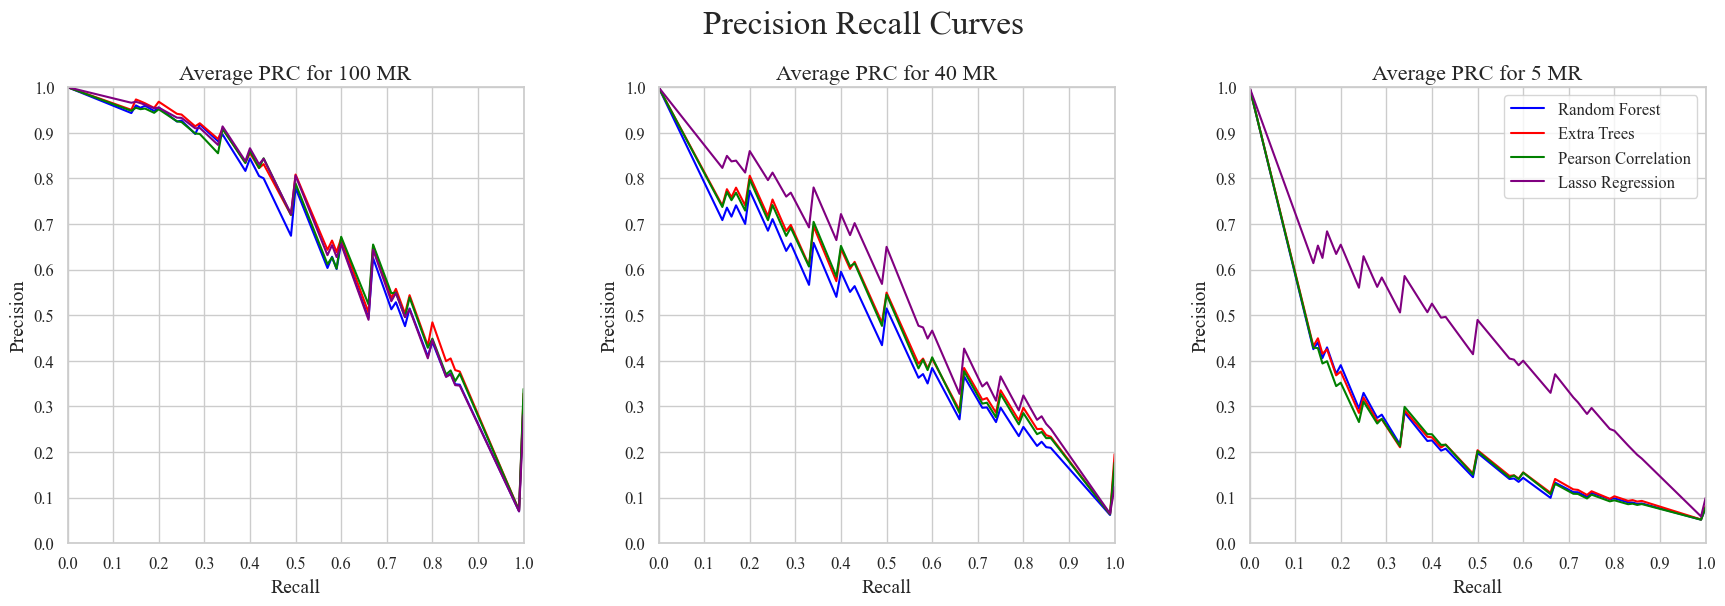

In [ ]:

from sklearn.metrics import precision_recall_curve, average_precision_score

def compute_precision_recall(importance, gt):
    precision_scores = np.zeros((101, 100))
    recall_scores = np.zeros((101, 100))
    auprcs = np.zeros((100, 1))

    for i in range(100):
        gt_i = gt[:, i]
        importance_i = importance[:, i]
        precision, recall, _ = precision_recall_curve(gt_i, importance_i)
        auprc = average_precision_score(gt_i, importance_i)
        interp = interp1d(recall, precision, kind='linear', bounds_error=False, fill_value=0)
        precision_interpolated = interp(np.linspace(0, 1, 101))
        precision_scores[:,i] = precision_interpolated
        recall_scores[:,i] = np.linspace(0, 1, 101)
        auprcs[i] = auprc

    return precision_scores, recall_scores,auprcs


print(importance_matrix.shape)


precision_scores, recall_scores, auprcs = compute_precision_recall(importance_matrix, ground_truth_matrix)
print(precision_scores.shape)
precision_scores_ets, recall_scores_ets, auprcs_ets = compute_precision_recall(importance_matrix_et, ground_truth_matrix)
precision_scores_rf_40, recall_scores_rf_40, auprcs_rf_40 = compute_precision_recall(importance_matrix_rf_40mr, ground_truth_matrix40mr)
precision_scores_rf_5, recall_scores_rf_5, auprcs_rf_5 = compute_precision_recall(importance_matrix_rf_5mr, ground_truth_matrix5mr)
precision_scores_et_40, recall_scores_et_40, auprcs_et_40 = compute_precision_recall(importance_matrix_et_40mr, ground_truth_matrix40mr)
precision_scores_et_5, recall_scores_et_5, auprcs_et_5 = compute_precision_recall(importance_matrix_et_5mr, ground_truth_matrix5mr)

precision_scores_pearson, recall_scores_pearson, auprcs_pearson = compute_precision_recall(importance_matrix_pearson100mr, ground_truth_matrix)
precision_scores_pearson40, recall_scores_pearson40, auprcs_pearson40 = compute_precision_recall(importance_matrix_pearson40mr, ground_truth_matrix40mr)
precision_scores_pearson5, recall_scores_pearson5, auprcs_pearson5 = compute_precision_recall(importance_matrix_pearson5mr, ground_truth_matrix5mr)

precision_scores_lasso, recall_scores_lasso, auprcs_lasso = compute_precision_recall(importance_matrix_lasso_100mr, ground_truth_matrix)
precision_scores_lasso40, recall_scores_lasso40, auprcs_lasso40 = compute_precision_recall(importance_matrix_lasso_40mr, ground_truth_matrix40mr)
precision_scores_lasso5, recall_scores_lasso5, auprcs_lasso5 = compute_precision_recall(importance_matrix_lasso_5mr, ground_truth_matrix5mr)


print(f"Average AUPRC Score 100 mr: {np.mean(auprcs)}")
print(f"Average AUPRC Score et 100 mr: {np.mean(auprcs_ets)}")
print(f"Average AUPRC Score 40 mr: {np.mean(auprcs_rf_40)}")
print(f"Average AUPRC Score et 40 mr ET: {np.mean(auprcs_et_40)}")
print(f"Average AUPRC Score 5 mr: {np.mean(auprcs_rf_5)}")
print(f"Average AUPRC Score et 5 mr: {np.mean(auprcs_et_5)}")

print(f"Average AUPRC Score Pearson 100 mr: {np.mean(auprcs_pearson)}")
print(f"Average AUPRC Score Pearson 40 mr: {np.mean(auprcs_pearson40)}")
print(f"Average AUPRC Score Pearson 5 mr: {np.mean(auprcs_pearson5)}")

print(f"Average AUPRC Score Lasso 100 mr: {np.mean(auprcs_lasso)}")
print(f"Average AUPRC Score Lasso 40 mr: {np.mean(auprcs_lasso40)}")
print(f"Average AUPRC Score Lasso 5 mr: {np.mean(auprcs_lasso5)}")

recall_standard = np.linspace(0, 1, 101)
average_precision_rf_100 = np.mean(precision_scores, axis=1)
average_precision_rf_40 = np.mean(precision_scores_rf_40, axis=1)
average_precision_rf_5 = np.mean(precision_scores_rf_5, axis=1)

average_precision_et_100 = np.mean(precision_scores_ets, axis=1)
average_precision_et_40 = np.mean(precision_scores_et_40, axis=1)
average_precision_et_5 = np.mean(precision_scores_et_5, axis=1)

average_precision_pearson_100 = np.mean(precision_scores_pearson, axis=1)
average_precision_pearson_40 = np.mean(precision_scores_pearson40, axis=1)
average_precision_pearson_5 = np.mean(precision_scores_pearson5, axis=1)

average_precision_lasso_100 = np.mean(precision_scores_lasso, axis=1)
average_precision_lasso_40 = np.mean(precision_scores_lasso40, axis=1)
average_precision_lasso_5 = np.mean(precision_scores_lasso5, axis=1)

# Plotting the AUPRC scores for 100 MR, 40 MR, and 5 MR
# Plotting the AUC scores for 100 MR, 40 MR, and 5 MR
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
print(average_precision_rf_100.shape)
axs[0].plot(recall_standard, average_precision_rf_100, color='blue', label='Random Forest')
axs[0].plot(recall_standard, average_precision_et_100, color='red', label='Extra Trees')
axs[0].plot(recall_standard, average_precision_pearson_100, color='green', label='Pearson')
axs[0].plot(recall_standard, average_precision_lasso_100, color='purple', label='Lasso')
axs[0].set_title('Average PRC for 100 MR')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_xlim([0, 1])
axs[0].set_ylim([0, 1])
axs[0].set_aspect('equal', adjustable='box')
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_yticks(np.arange(0, 1.1, 0.1))
axs[0].set_xticklabels(np.round(np.arange(0, 1.1, 0.1), 2))
axs[0].set_yticklabels(np.round(np.arange(0, 1.1, 0.1), 2))
axs[0].set_title('Average PRC for 100 MR')


axs[1].plot(recall_standard, average_precision_rf_40, color='blue', label='Random Forest 40 MR')
axs[1].plot(recall_standard, average_precision_et_40, color='red', label='Extra Trees 40 MR')
axs[1].plot(recall_standard, average_precision_pearson_40, color='green', label='Pearson 40 MR')
axs[1].plot(recall_standard, average_precision_lasso_40, color='purple', label='Lasso 40 MR')
axs[1].set_title('Average PRC for 40 MR')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_xlim([0, 1])
axs[1].set_ylim([0, 1])
axs[1].set_aspect('equal', adjustable='box')
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_yticks(np.arange(0, 1.1, 0.1))
axs[1].set_xticklabels(np.round(np.arange(0, 1.1, 0.1), 2))
axs[1].set_yticklabels(np.round(np.arange(0, 1.1, 0.1), 2))
axs[1].set_title('Average PRC for 40 MR')

axs[2].plot(recall_standard, average_precision_rf_5, color='blue', label='Random Forest')
axs[2].plot(recall_standard, average_precision_et_5, color='red', label='Extra Trees')
axs[2].plot(recall_standard, average_precision_pearson_5, color='green', label='Pearson Correlation')
axs[2].plot(recall_standard, average_precision_lasso_5, color='purple', label='Lasso Regression')
axs[2].set_title('Average PRC for 5 MR')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_xlim([0, 1])
axs[2].set_ylim([0, 1])
axs[2].legend()

axs[2].set_aspect('equal', adjustable='box')
axs[2].set_xticks(np.arange(0, 1.1, 0.1))
axs[2].set_yticks(np.arange(0, 1.1, 0.1))
axs[2].set_xticklabels(np.round(np.arange(0, 1.1, 0.1), 2))
axs[2].set_yticklabels(np.round(np.arange(0, 1.1, 0.1), 2))
plt.tight_layout()
plt.suptitle('Precision Recall Curves', fontsize=24)
plt.subplots_adjust(top=0.85)  # Adjust the top margin to make room for the title
plt.show()



In [ ]:
def reconstruct_network(importance_matrix, threshold):
    """Reconstruct network using importance threshold.
    
    Args:
        importance_matrix: Matrix of feature importance scores
        threshold: Threshold for considering a connection
        
    Returns:
        Binary adjacency matrix
    """
    return (importance_matrix > threshold).astype(int)

def create_adjacency_matrix(edge_list, n_tfs, n_targets):
    adj_matrix = np.zeros((n_tfs, n_targets))
    for tf, target in edge_list:
        adj_matrix[int(tf), int(target-100)] = 1
    return adj_matrix

def evaluate_network(predicted, ground_truth):
    
    n_tfs, n_targets = predicted.shape
    ground_truth_matrix = create_adjacency_matrix(ground_truth, n_tfs, n_targets)
    
    # Calculate binary metrics
    precision = precision_score(ground_truth_matrix.flatten(), predicted.flatten())
    recall = recall_score(ground_truth_matrix.flatten(), predicted.flatten())
    f1 = f1_score(ground_truth_matrix.flatten(), predicted.flatten())
    
    # Calculate AUROC
    fpr, tpr, _ = roc_curve(ground_truth_matrix.flatten(), predicted.flatten())
    auroc = auc(fpr, tpr)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auroc': auroc,
        'fpr': fpr,
        'tpr': tpr
    }
# Try different thresholds
thresholds = np.linspace(0, 1, 100)
metrics_100mr = []
ground_truth_matrix = create_adjacency_matrix(ground_truth, 100, 100)
print(np.sum(ground_truth_matrix, axis=0))

# metrics_100mr is a list of dictionaries
for threshold in thresholds:
    predicted_network = reconstruct_network(importance_matrix, threshold)
    metric = evaluate_network(predicted_network, ground_truth)
    metric['threshold'] = threshold
    metrics_100mr.append(metric)


metrics_df = pd.DataFrame(metrics_100mr)
print(metrics_df)



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

c:\Users\hayde\anaconda3\envs\mlbiosci_final\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hayde\anaconda3\envs\mlbiosci_final\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hayde\anaconda3\envs\mlbiosci_final\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

    precision    recall        f1     auroc  \
0    0.048700  1.000000  0.092877  0.500000   
1    0.155481  0.856263  0.263175  0.809084   
2    0.544974  0.634497  0.586338  0.803688   
3    0.818505  0.472279  0.598958  0.733459   
4    0.942529  0.336756  0.496218  0.667852   
..        ...       ...       ...       ...   
95   0.000000  0.000000  0.000000  0.500000   
96   0.000000  0.000000  0.000000  0.500000   
97   0.000000  0.000000  0.000000  0.500000   
98   0.000000  0.000000  0.000000  0.500000   
99   0.000000  0.000000  0.000000  0.500000   

                                  fpr                              tpr  \
0                          [0.0, 1.0]                       [0.0, 1.0]   
1     [0.0, 0.23809523809523808, 1.0]   [0.0, 0.8562628336755647, 1.0]   
2    [0.0, 0.027120782087669507, 1.0]   [0.0, 0.6344969199178645, 1.0]   
3    [0.0, 0.005361084831283507, 1.0]   [0.0, 0.4722792607802875, 1.0]   
4   [0.0, 0.0010511931041732366, 1.0]  [0.0, 0.33675564681724846,

c:\Users\hayde\anaconda3\envs\mlbiosci_final\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hayde\anaconda3\envs\mlbiosci_final\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hayde\anaconda3\envs\mlbiosci_final\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

#### Plotting 

NameError: name 'metrics_df' is not defined

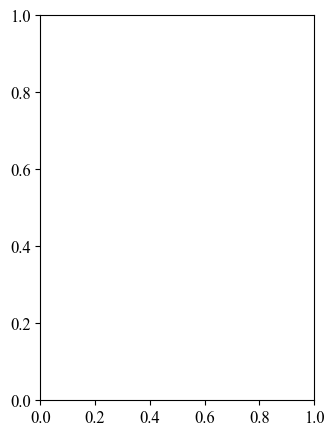

In [29]:
# Plot performance metrics
plt.figure(figsize=(12, 5))

# Plot 1: Threshold-based metrics
plt.subplot(1, 3, 1)
plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision')
plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['f1'], label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs Threshold')
plt.legend()
plt.grid(True)

# Plot 2: ROC curve
plt.subplot(1, 3, 2)
best_idx = metrics_df['f1'].argmax()
best_metric = metrics_df.iloc[best_idx]
plt.plot(best_metric['fpr'], best_metric['tpr'], label=f'ROC curve (AUC = {best_metric["auroc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(metrics_df['threshold'], metrics_df['auroc'], label='AUROC')
plt.xlabel('Threshold')
plt.ylabel('AUROC')
plt.title('AUROC vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print best metrics
print(f"Best threshold: {best_metric['threshold']:.3f}")
print(f"Best F1-score: {best_metric['f1']:.3f}")
print(f"AUROC: {best_metric['auroc']:.3f}")
print(f"Precision: {best_metric['precision']:.3f}")
print(f"Recall: {best_metric['recall']:.3f}")

$\log_2(\text{data} + 1)$
